You have a link to a happy or sad dataset which contains 80 images, 40 happy and 40 sad. Create a convolutional neural network that trains to 100% accuracy on these images, which cancels training upon hitting training accuracy of >.999

Hint -- it will work best with 3 convolutional layers.

I decided to cut 4 images from each happy or sad folders to make a validation dataset.

In [1]:
import os
import tensorflow as tf

In [2]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('acc')>0.9):
            print('\nReached accuracy of 99.9%, stop training!')
            self.model.stop_training = True
myCallback = MyCallback()

In [3]:
path_to_training_data = os.path.join('happy-or-sad')
path_to_validation_data = os.path.join('happy-or-sad-validation')

path_to_training_happy_data = os.path.join('happy-or-sad/happy')
path_to_training_sad_data = os.path.join('happy-or-sad/sad')
path_to_validation_happy_data = os.path.join('happy-or-sad-validation/happy')
path_to_validation_sad_data = os.path.join('happy-or-sad-validation/sad')

In [4]:
list_of_training_happy_data = os.listdir(path_to_training_happy_data)
list_of_training_sad_data = os.listdir(path_to_training_sad_data)
list_of_validation_happy_data = os.listdir(path_to_validation_happy_data)
list_of_validation_sad_data = os.listdir(path_to_validation_sad_data)

In [5]:
print("Happy training data: ", list_of_training_happy_data[:10])
print("Sad training data: ", list_of_training_sad_data[:10])
print("Happy validation data: ", list_of_validation_happy_data[:10])
print("Sad validation data: ", list_of_validation_sad_data[:10])
print("Happy training data length: ", len(list_of_training_happy_data))
print("Sad training data length: ", len(list_of_training_sad_data))
print("Happy validation data length: ", len(list_of_validation_happy_data))
print("Sad validation data length: ", len(list_of_validation_sad_data))

Happy training data:  ['happy1-00.png', 'happy1-01.png', 'happy1-02.png', 'happy1-03.png', 'happy1-04.png', 'happy1-05.png', 'happy1-06.png', 'happy1-07.png', 'happy1-08.png', 'happy1-09.png']
Sad training data:  ['sad1-00.png', 'sad1-01.png', 'sad1-02.png', 'sad1-03.png', 'sad1-04.png', 'sad1-05.png', 'sad1-06.png', 'sad1-07.png', 'sad1-08.png', 'sad1-09.png']
Happy validation data:  ['happy1-12.png', 'happy2-01.png', 'happy2-10.png', 'happy2-19.png']
Sad validation data:  ['sad1-12.png', 'sad2-01.png', 'sad2-10.png', 'sad2-19.png']
Happy training data length:  36
Sad training data length:  36
Happy validation data length:  4
Sad validation data length:  4


# Let's draw some!

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import random

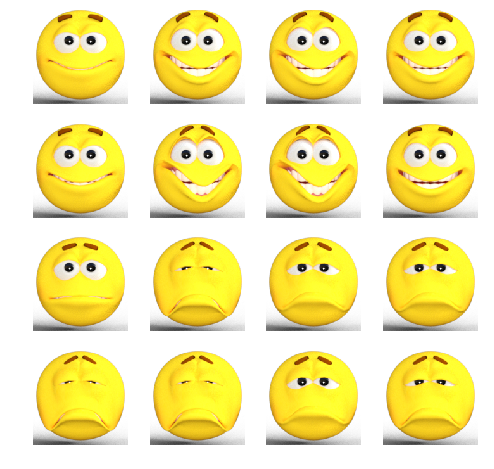

In [7]:
nrows = 4
ncols = 4

random.shuffle(list_of_training_happy_data)
random.shuffle(list_of_training_sad_data)

fig = plt.gcf()
fig.set_size_inches(nrows * 2, ncols * 2)

list_of_paths_to_training_happy_data = [os.path.join(path_to_training_happy_data, fname) 
                                        for fname in list_of_training_happy_data[:8]]
list_of_paths_to_training_sad_data = [os.path.join(path_to_training_sad_data, fname) 
                                        for fname in list_of_training_sad_data[:8]]

for i, path in enumerate(list_of_paths_to_training_happy_data + list_of_paths_to_training_sad_data):
    plt.subplot(nrows, ncols, i + 1)
    plt.axis('Off')
    pic = img.imread(path)
    plt.imshow(pic)
plt.show()

# It is time to build our model.

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0         
__________

In [10]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

# Preprocessing our images.

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)
validation_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
        'happy-or-sad',
        target_size = (150, 150),
        batch_size = 6,
        class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
        'happy-or-sad-validation',
        target_size = (150, 150),
        batch_size = 1,
        class_mode = 'binary'
)

Found 72 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


# Training

In [12]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=6,  
      epochs=15,
      validation_data = validation_generator,
      validation_steps = 4,
      verbose = 1,
      callbacks=[myCallback])

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
12/12 [==============================] - 2s 158ms/step - loss: 1.2647 - acc: 0.5833 - val_loss: 0.5948 - val_acc: 0.5000
Epoch 2/15
12/12 [==============================] - 0s 24ms/step - loss: 0.5646 - acc: 0.6806 - val_loss: 0.2157 - val_acc: 1.0000
Epoch 3/15
12/12 [==============================] - 0s 25ms/step - loss: 0.3688 - acc: 0.8194 - val_loss: 0.1064 - val_acc: 1.0000
Epoch 4/15
8/8 [==============================] - 0s 5ms/step - loss: 0.0527 - acc: 1.0000

Reached accuracy of 99.9%, stop training!
12/12 [==============================] - 0s 25ms/step - loss: 0.1610 - acc: 0.9444 - val_loss: 0.0527 - val_acc: 1.0000


# Let's test on some images from the internet.

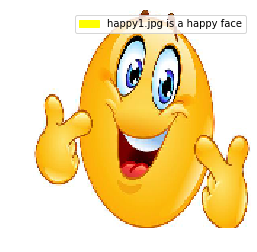

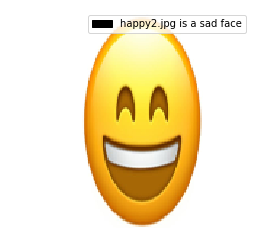

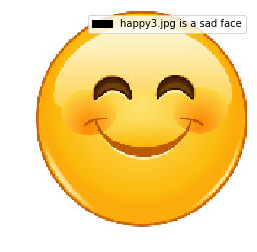

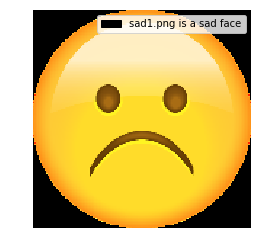

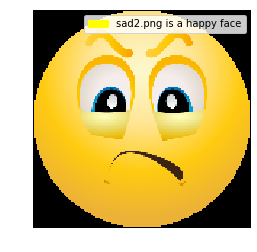

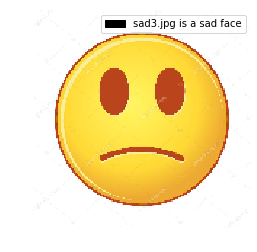

In [13]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.patches as mpatches

path_to_test_data = os.path.join('test-from-internet')
list_of_test_data = os.listdir(path_to_test_data)

for fn in list_of_test_data:
 
    path = os.path.join(path_to_test_data, fn)
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    plt.axis('Off')
    
    classes = model.predict(images, batch_size=1)
    if classes[0]>0.5:
        plt.legend(handles=[mpatches.Patch(color='black', label=fn + " is a sad face")])
    else:
        plt.legend(handles=[mpatches.Patch(color='yellow', label=fn + " is a happy face")])
        
    plt.imshow(img)
    plt.show()
 

Results are pretty random, so I think this is because of the fact that training data is too small and similar, so CNN is unable to make meaningful patterns.

# Visualizing Intermediate Representations

Took below code from course.

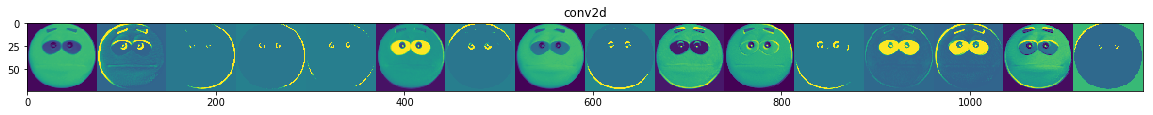

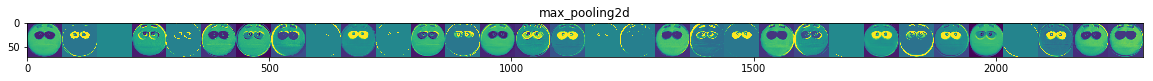

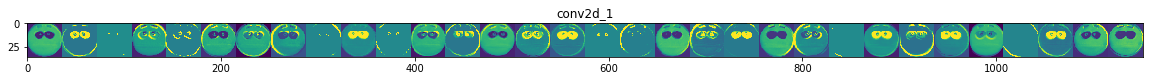

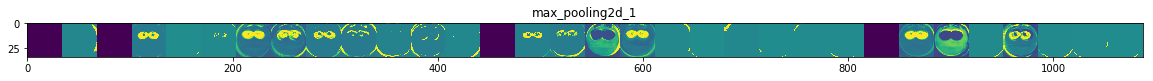

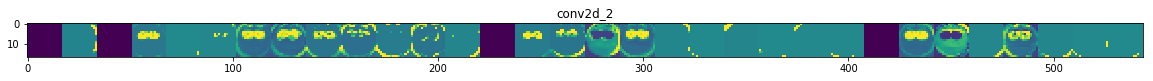

In [14]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
happy_img_files = [os.path.join(path_to_training_happy_data, f) for f in list_of_training_happy_data]
sad_img_files = [os.path.join(path_to_training_sad_data, f) for f in list_of_training_sad_data]
img_path = random.choice(happy_img_files + sad_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map
        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            # Postprocess the feature to make it visually palatable
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            # We'll tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
        # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')